# **Exercise 7.05**
# **Building a Convolutional Neural Network**

The dataset we will be using is a rite of passage for image classification. The images were collected for the dataset by none other than Alex Krizhevsky, Vinod Nair, and Geoffery Hinton. If these names aren’t familiar to you yet, they will be. They created the dataset CIFAR10 and CIFAR100 that you’ll be using in Activity 7.1. The dataset cosists of 60,000 images that are 32 x 32. There are 10 classes of 6,000 images each. The dataset contains 50,000 training images and 10,000 test images.
Another great thing about CIFAR10 is that we can load the datset directly from TensorFlow datasets. While it’s extremely important to spend time getting familiar with loading datasets, that isn’t the focus of this chapter. So we can benefit by being able to get going fast.


**1. Import Tensorflow**

In [2]:
import tensorflow as tf

**2. Check TensorFlow version**

In [3]:
print(tf.__version__)

2.5.0


**3. Import additional libraries.**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


**4. Load the CIFAR10 dataset.**

In [5]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)


170500096/170498071 [==============================] - 17s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


**5. Check the number of classes.**

In [6]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


**6. Build the model.**

In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)


2021-08-03 13:01:31.372662: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**7. Compile the model.**

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


2021-08-03 13:01:34.918732: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5482 - accuracy: 0.4351 - val_loss: 1.2527 - val_accuracy: 0.5491
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2467 - accuracy: 0.5525 - val_loss: 1.0930 - val_accuracy: 0.6076
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1208 - accuracy: 0.6021 - val_loss: 1.0518 - val_accuracy: 0.6215
Epoch 4/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0346 - accuracy: 0.6319 - val_loss: 0.9737 - val_accuracy: 0.6511
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9554 - accuracy: 0.6606 - val_loss: 0.9697 - val_accuracy: 0.6545
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9116 - accuracy: 0.6760 - val_loss: 0.9099 - val_accuracy: 0.6828
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8570 - accuracy: 0.6959 - val_loss: 0.9144 -

**8. Plot loss.**

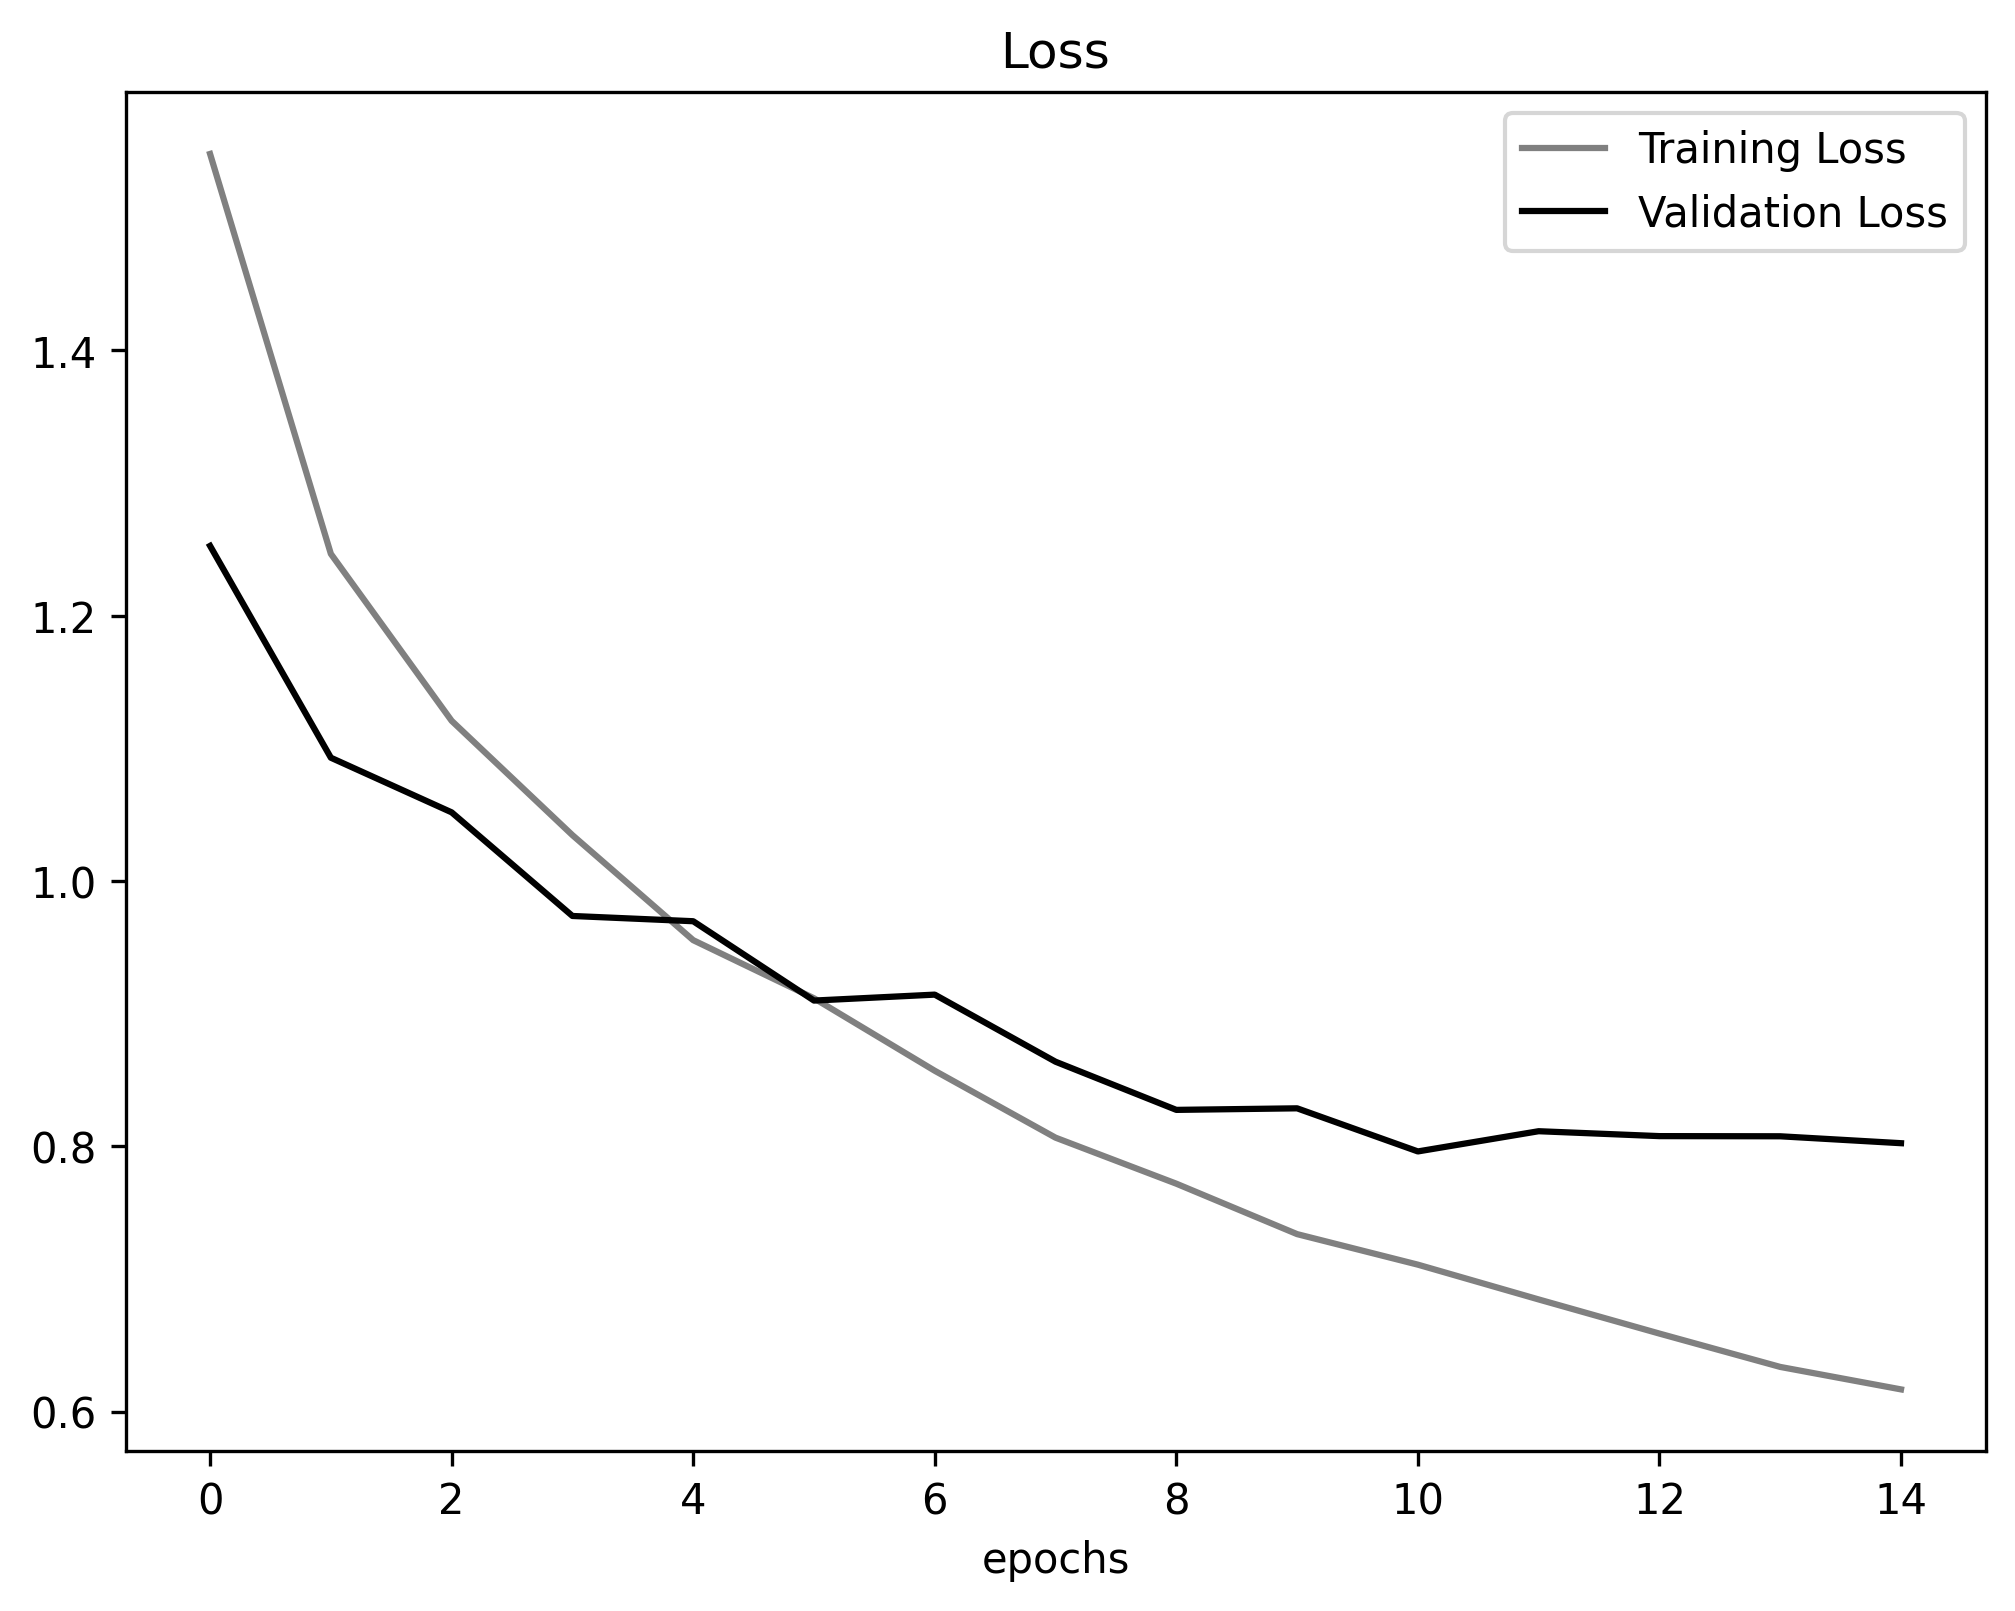

In [43]:
plt.figure(figsize=(8,6), dpi=300)
plt.plot(r.history['loss'], label='Training Loss', color='gray')
plt.plot(r.history['val_loss'], label='Validation Loss', color='k')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()

**9. Plot accuracy**

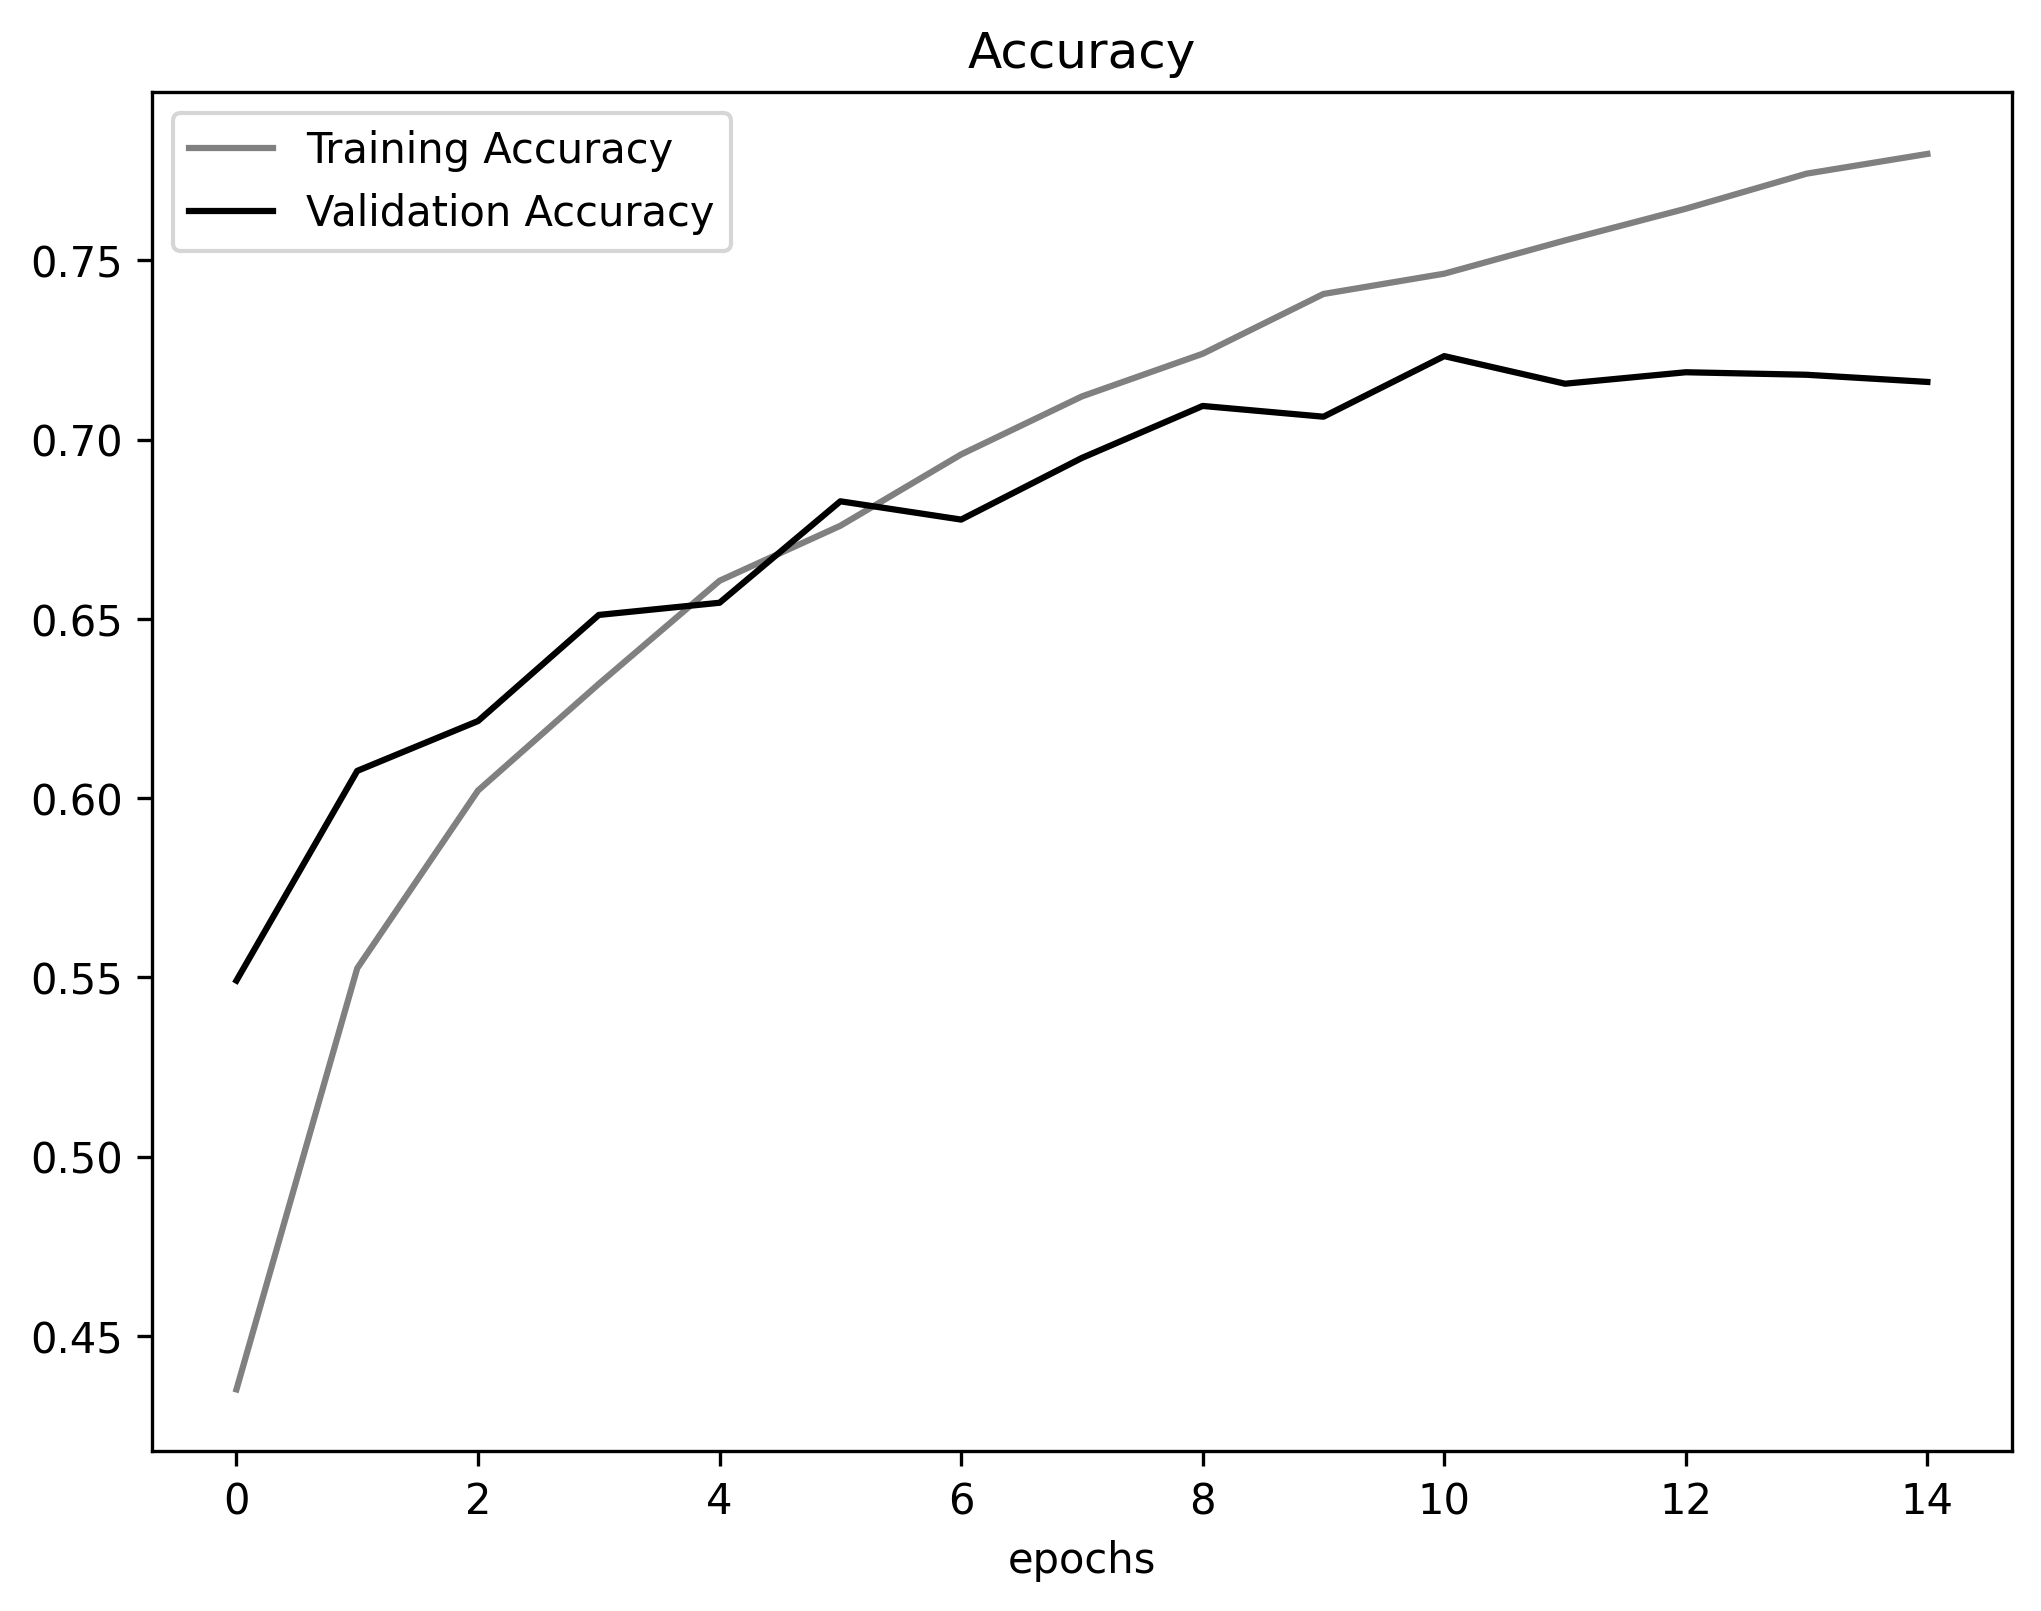

In [47]:
plt.figure(figsize=(8,6), dpi=300)
plt.plot(r.history['accuracy'], label='Training Accuracy', color='gray')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color='k')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.savefig('7-44.png')

**10. Plot confusion matrix with and without normalization.**

Normalized confusion matrix
[[0.746 0.013 0.031 0.019 0.023 0.004 0.005 0.01  0.104 0.045]
 [0.016 0.768 0.007 0.007 0.005 0.004 0.006 0.003 0.04  0.144]
 [0.063 0.004 0.541 0.068 0.148 0.074 0.039 0.024 0.027 0.012]
 [0.021 0.008 0.05  0.463 0.085 0.239 0.068 0.03  0.013 0.023]
 [0.027 0.002 0.03  0.04  0.768 0.043 0.031 0.039 0.012 0.008]
 [0.008 0.006 0.022 0.146 0.068 0.675 0.021 0.04  0.006 0.008]
 [0.005 0.006 0.03  0.057 0.075 0.039 0.766 0.004 0.011 0.007]
 [0.012 0.    0.021 0.041 0.103 0.05  0.008 0.736 0.004 0.025]
 [0.039 0.013 0.009 0.014 0.013 0.006 0.007 0.004 0.863 0.032]
 [0.026 0.058 0.008 0.012 0.01  0.007 0.005 0.011 0.028 0.835]]


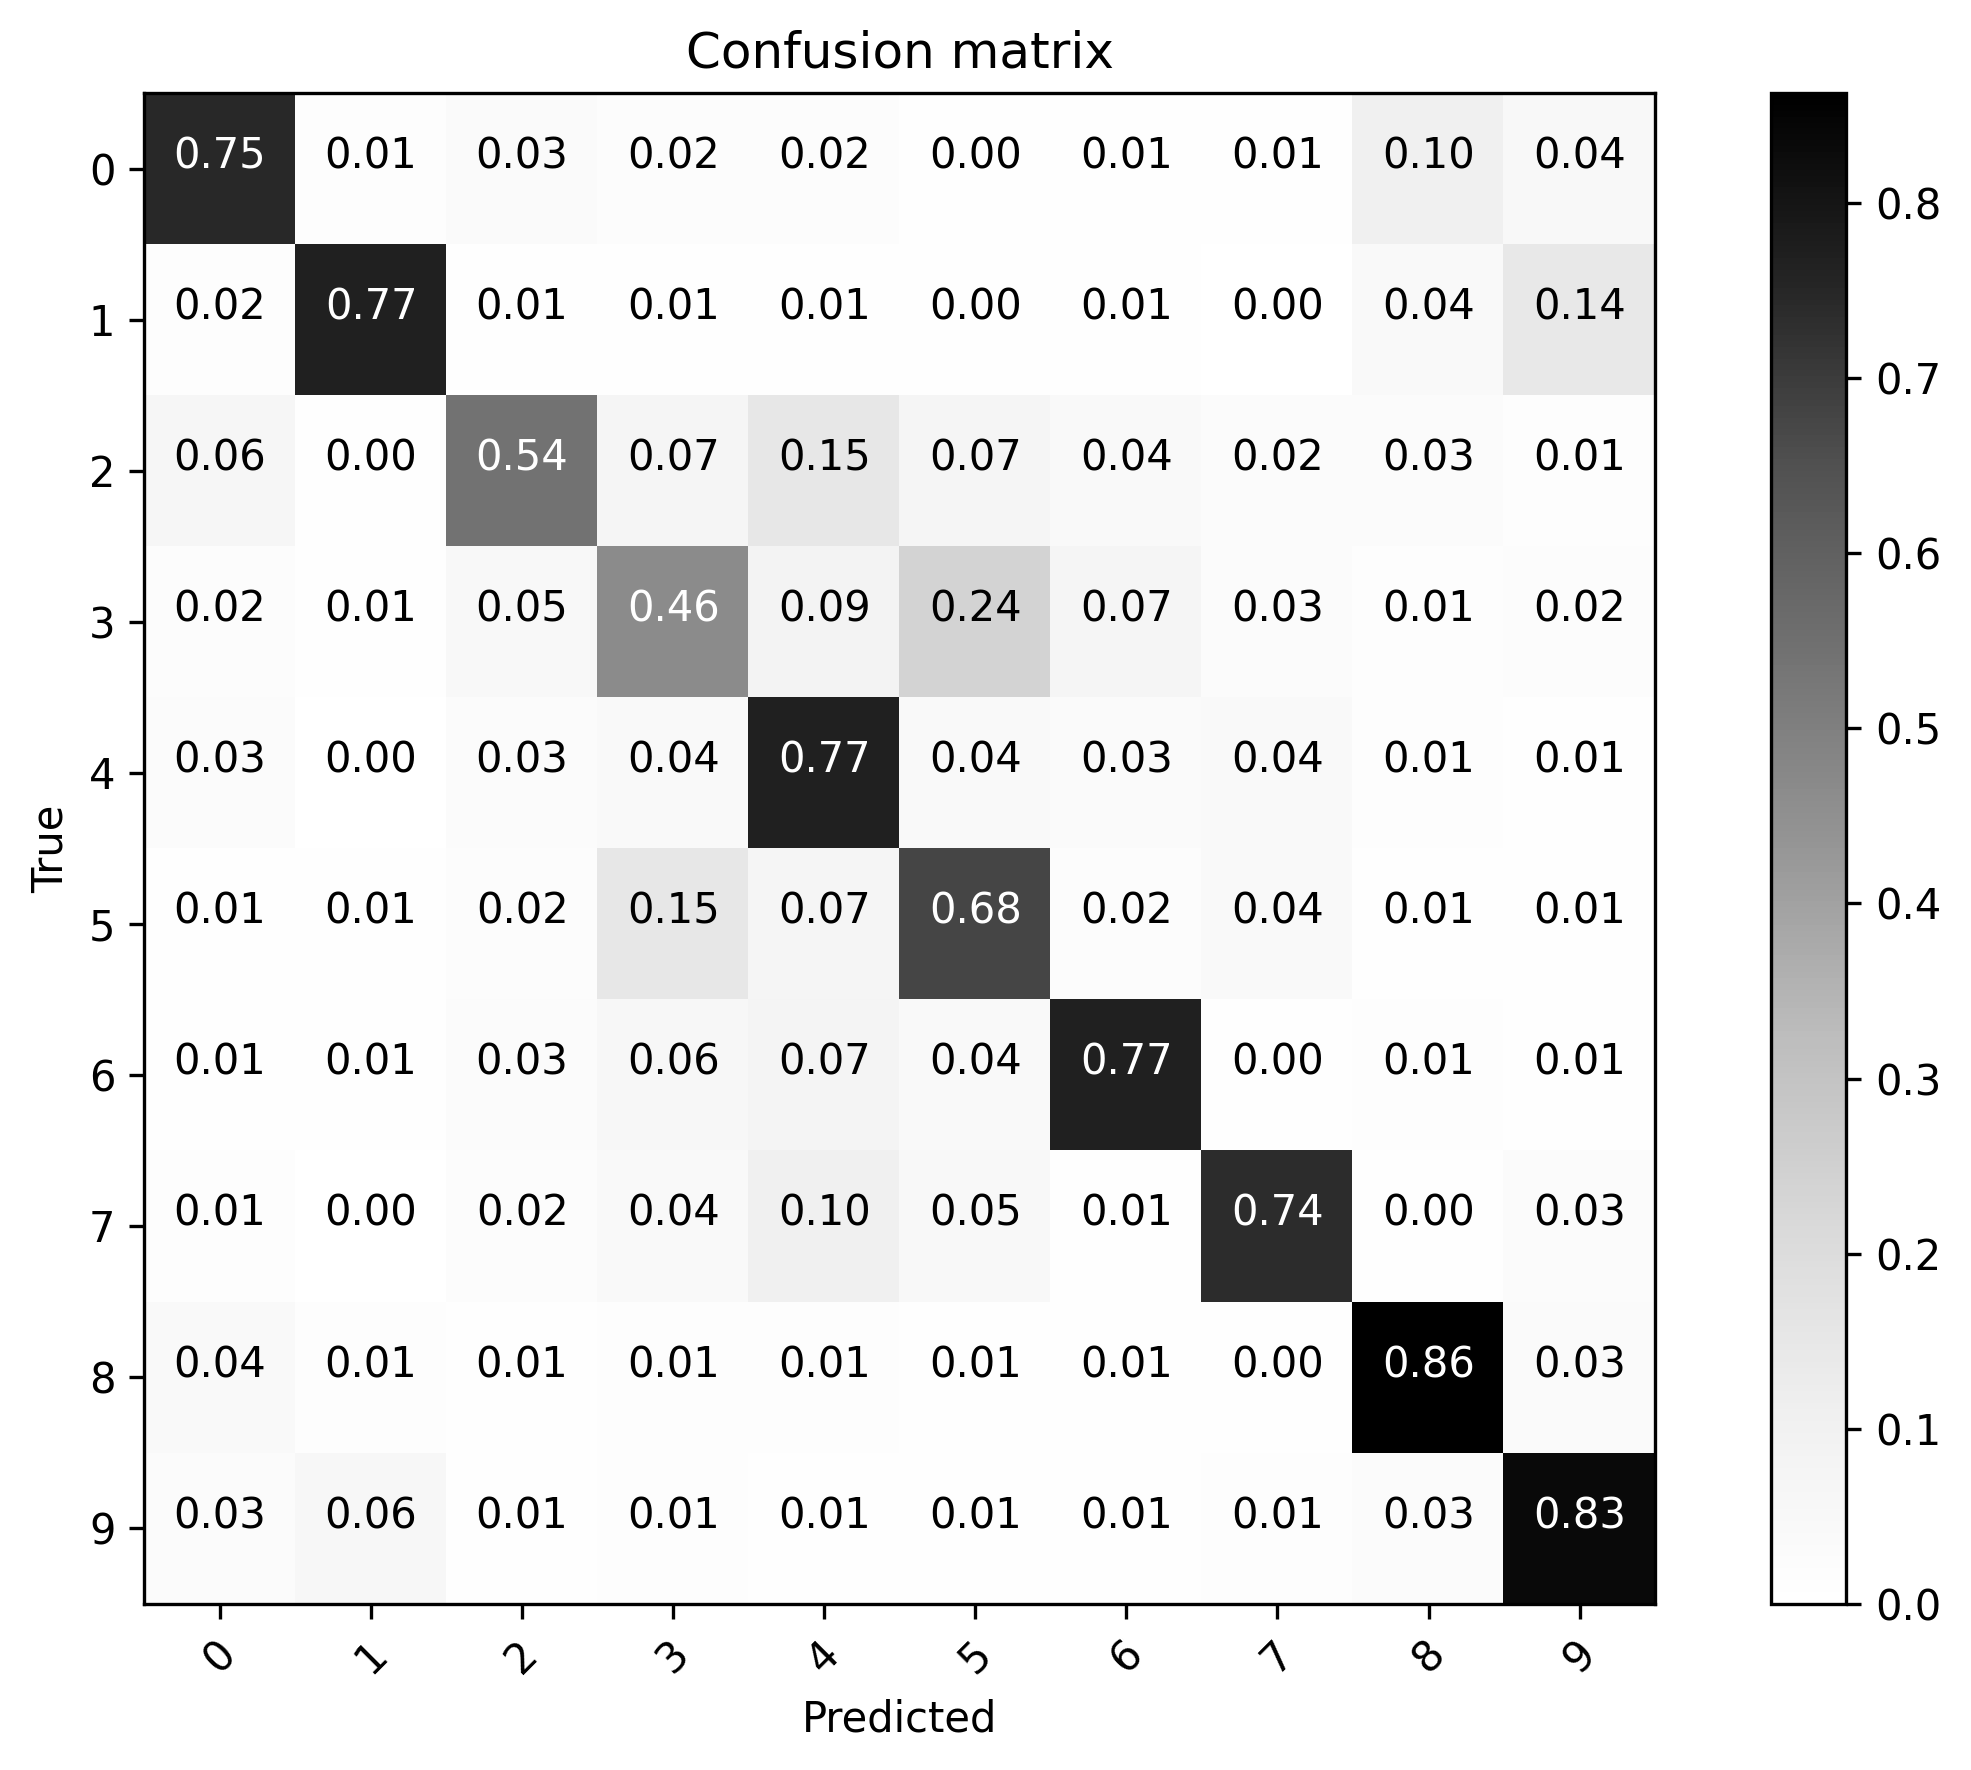

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8,6), dpi=300)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
	
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig('7-46.png')
    plt.show() 
    

pred_test = model.predict(x_test).argmax(axis=1)
c_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(c_mat, list(range(10)), normalize=True)

**11. Label mapping.**

In [20]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()


**12. Check random incorrectly classified image.**

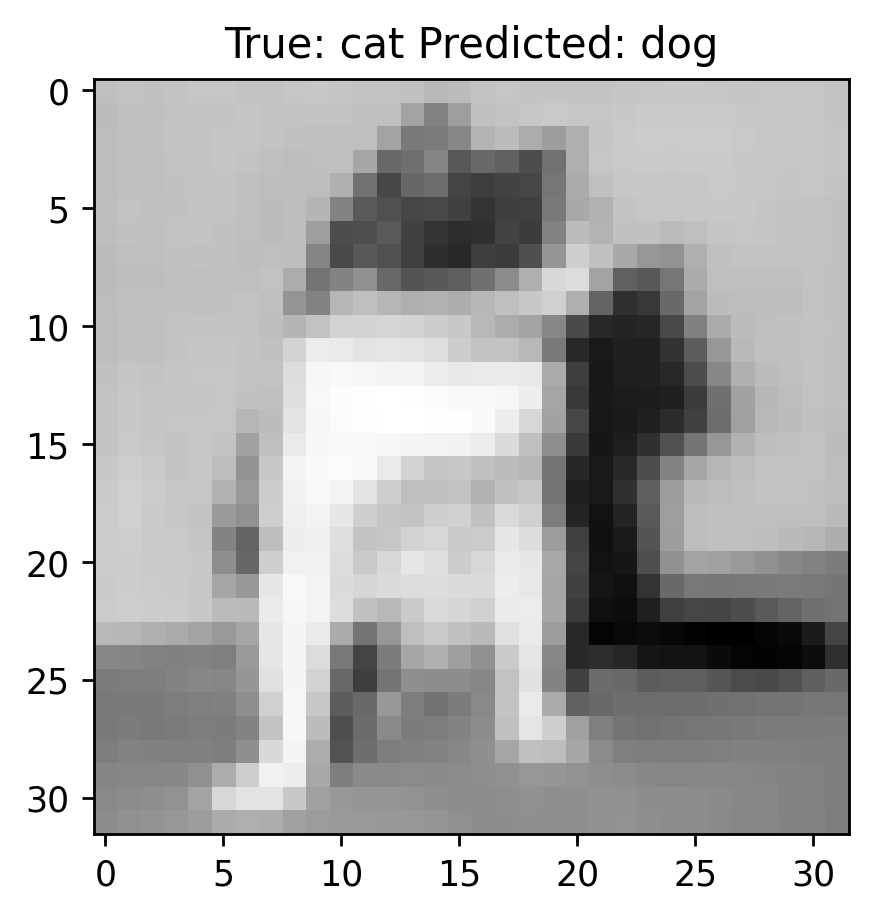

In [41]:
wrong = np.where(pred_test != y_test)[0]
i = np.random.choice(wrong)
plt.figure(figsize=(4,4), dpi=250)
plt.imshow(x_test[i,:,:,1], cmap='gray')
plt.title("True: %s Predicted: %s" % (labels[y_test[i]], labels[pred_test[i]]));